## Section 1: Data Importing

In [18]:
#importing packages for data cleaning and manipulation
import sys
sys.path.append('../') #ensures that the parent directory is in Python's search path, if later I decide to import functions from seperate py files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [19]:
#importing data obtained from "https://archive.ics.uci.edu/dataset/73/mushroom"
#setting data path as outside src directory within data directory
data_path = os.path.join('..', 'data', 'agaricus-lepiota.data')\
#setting column names for the dataset, obtained from agaricus-lepiota.names
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]
#loading the data into a pandas dataframe, utilising our data path, column names and setting '?' as NaN as per agaricus-lepiota.names line #142
lepiota_data = pd.read_csv(data_path, header=None, names=column_names, na_values='?')

In [20]:
lepiota_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Section 2: Data Cleansing

In [21]:
#generating a table of missing data points
missing = pd.concat([lepiota_data.isnull().sum(), 100 * lepiota_data.isnull().mean()], axis=1)
missing.columns=['Missing Values', '%']
missing.sort_values(by='Missing Values', ascending=False)
#all missing data is consistent with that described in agaricus-lepiota.names lines #142-143

,Missing Values,%
stalk-root,2480,30.526834
cap-shape,0,0.000000
class,0,0.000000
cap-color,0,0.000000
bruises,0,0.000000
odor,0,0.000000
cap-surface,0,0.000000
gill-attachment,0,0.000000
gill-spacing,0,0.000000
gill-color,0,0.000000


In [22]:
#generating a table of instances of trailing or leading whitespace in the dataset
whitespace = lepiota_data.map(lambda x: isinstance(x, str) and (x != x.strip()))
whitespace = pd.concat([whitespace.sum(), 100 * whitespace.mean()], axis=1)
whitespace.columns = ['Whitespace Counts', '%']
whitespace.sort_values(by='Whitespace Counts', ascending=False)
#no whitespace in the dataset

,Whitespace Counts,%
class,0,0.0
cap-shape,0,0.0
cap-surface,0,0.0
cap-color,0,0.0
bruises,0,0.0
odor,0,0.0
gill-attachment,0,0.0
gill-spacing,0,0.0
gill-size,0,0.0
gill-color,0,0.0


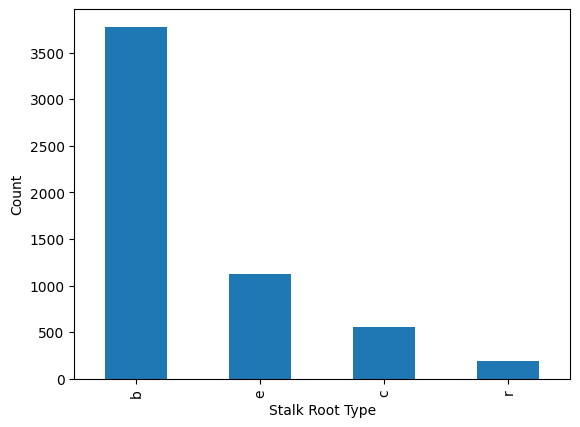

In [23]:
lepiota_data['stalk-root'].value_counts().plot(kind='bar')
plt.xlabel('Stalk Root Type')
plt.ylabel('Count')
plt.show()
#getting an idea of the distrubution of stalk root types in the dataset to inform how to handle missing data

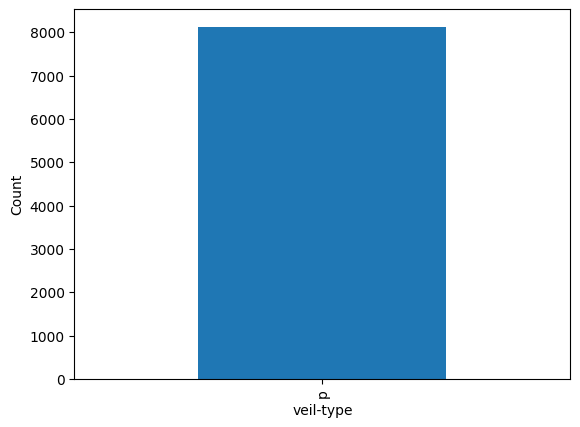

In [24]:
lepiota_data['veil-type'].value_counts().plot(kind='bar')
plt.xlabel('veil-type')
plt.ylabel('Count')
plt.show()
#veil-type is a constant value, so we can drop it from the dataset at a later stage

In [25]:
#changing the missing values in the dataset to 'missing' to allow for easier handling of missing data later on
lepiota_data = lepiota_data.fillna(value='missing')
lepiota_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [26]:
#renaming the 'class' column to 'poisonous' to better reflect the data and the target variable of the investigation
lepiota_data.rename(columns={'class': 'poisonous'}, inplace=True)
lepiota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Section 3: Exploratory Data Analysis

#checking distrubution of focus variable
